<a href="https://colab.research.google.com/github/Reva694/rawuh-model/blob/main/deep_learning_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('connect drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.8 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image

import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
DIRECTORY = "/content/drive/MyDrive/datasetpresensiwajah"
DIRECTORY_train='/content/drive/MyDrive/datasetpresensiwajah/Data Train'
DIRECTORY_test='/content/drive/MyDrive/datasetpresensiwajah/Data Test'

# Data Sample

(1600, 900, 3, 3)


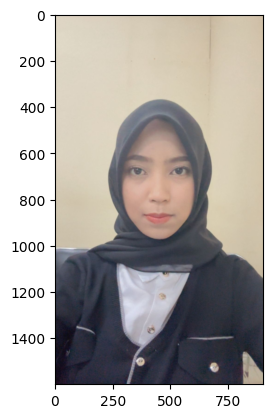

In [ ]:
import numpy as np # linear algebra
filename = "/content/drive/MyDrive/datasetpresensiwajah/Data Test/5231911020_siti nabila maulidya_1.jpg"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

# MTCNN

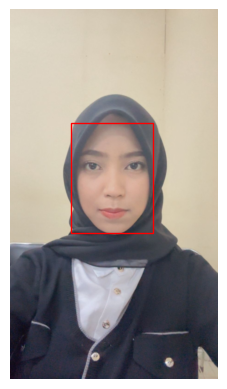

Gambar aktif: /content/drive/MyDrive/datasetpresensiwajah/Data Test/5231911020_siti nabila maulidya_1.jpg


In [ ]:
detector = MTCNN()

rgb_pixels = plt.imread(filename)
results = detector.detect_faces(rgb_pixels)

def draw_image_with_boxes(data, result_list, filename=None):
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.axis('off')
    plt.show()
    if filename:
        print("Gambar aktif:", filename)

draw_image_with_boxes(rgb_pixels, results, filename)

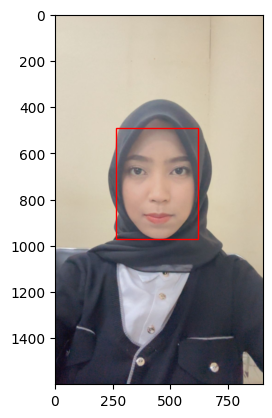

In [ ]:
def draw_image_with_boxes(data, result_list):
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()

draw_image_with_boxes(rgb_pixels, results)

# Extract and normalise the face pixels

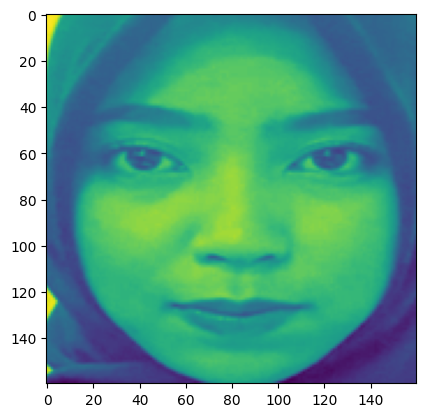

In [ ]:
def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)

    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    image = image.convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)

    if len(results) == 0: # Add this check
        return None # Return None if no face is detected

    x1, y1, width, height = results[0]['box']

    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]

    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)

    return gray_face

detector = MTCNN()

face_pixels = extract_face_from_file("/content/drive/MyDrive/datasetpresensiwajah/Data Test/5231911020_siti nabila maulidya_1.jpg")

if face_pixels is not None: # Add this check for plotting
    plt.imshow(face_pixels)
    plt.show() # Added plt.show()

In [ ]:
def list_files(directory, contains):
    # List files in the directory and filter by 'contains'
    files = [f for f in listdir(directory) if contains in f]
    # Return a DataFrame with the filenames
    return pd.DataFrame(files, columns=['filename'])

100%|██████████| 15/15 [02:29<00:00,  9.99s/it]


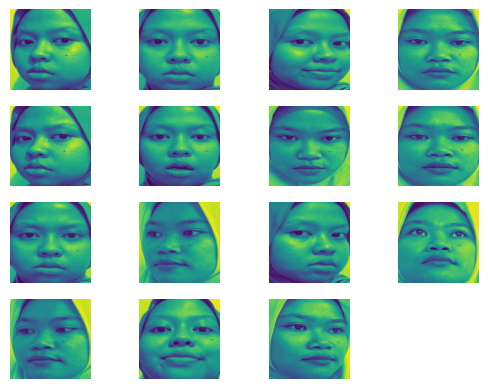

In [ ]:
import os
import numpy as np # linear algebra
i = 1
faces = list()

for filename in tqdm(list(os.listdir(DIRECTORY_train))[0:15]):
    path = filename

    # path
    path = DIRECTORY_train + "/" + filename
    # get face
    face = extract_face_from_file(path)
    # plot
    plt.subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(face)
    faces.append(face)
    i += 1
plt.show()

In [ ]:
import os

def list_files(directory, contains):
    files = []
    for file in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file)) and contains in file:
            files.append(file)
    return files

# Ambil daftar file dari folder test
filenames2 = list_files(DIRECTORY_test, '')

# Buat DataFrame dari daftar file
df_test = pd.DataFrame(filenames2, columns=['filename'])

# Pisahkan nama file berdasarkan titik (.)
split_cols = df_test['filename'].str.split(".", expand=True)

# Kalau ada minimal dos bagian (misalnya nama & kategori)
if split_cols.shape[1] >= 2:
    df_test['category'] = split_cols.iloc[:, 1]
else:
    df_test['category'] = None

# Tambahkan kolom subject
df_test['subject'] = df_test['filename'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else None)


# Tampilkan hasil
display(df_test)

In [ ]:
def list_files(directory):
    files = []
    for file in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file)):
            files.append(file)
    return pd.DataFrame(files, columns=['filename'])

# Ambil daftar file dari folder test
df_test = list_files(DIRECTORY_test)

# Pisahkan nama file berdasarkan titik (.)
if not df_test.empty:
    split_cols = df_test['filename'].str.split(".", expand=True)

    # Kalau ada minimal dua bagian (misalnya nama & kategori)
    if split_cols.shape[1] >= 2:
        df_test['category'] = split_cols.iloc[:, 1]
    else:
        df_test['category'] = None

    # Tambahkan kolom subject kosong (karena kamu nggak pakai subject)
    df_test['subject'] = None

    # Tampilkan hasil
    display(df_test)
else:
    print(f"No files found in {DIRECTORY_test}")
    df_test = pd.DataFrame(columns=['filename', 'category', 'subject']) # Ensure consistent columns

,filename,category,subject
0,5221911012_Debora_02.jpg,jpg,None
1,5221911012_Debora_01.jpg,jpg,None
2,5221911012_Debora_39.jpg,jpg,None
3,5221911012_Debora_40.jpg,jpg,None
4,5231811004_Hamdanu Fahmi Utomo_13.jpg,jpg,None
...,...,...,...
419,5231911020_siti nabila maulidya_15.jpg,jpg,None
420,5231911020_siti nabila maulidya_1.jpg,jpg,None
421,5231911019_Glory Valentio Duska Putra_23.jpg,jpg,None
422,5231911019_Glory Valentio Duska Putra_03.jpg,jpg,None


In [ ]:
x_train=df_train.loc[:,['category','filename']]
x_test=df_test.loc[:,['category','filename']]
y_train=df_train.loc[:,['subject']]
y_test=df_test.loc[:,['subject']]

In [ ]:
# Ambil daftar file dari folder train
df_train = list_files(DIRECTORY_train)

# Pisahkan nama file berdasarkan titik (.)
if not df_train.empty:
    split_cols_train = df_train['filename'].str.split(".", expand=True)

    # Kalau ada minimal dua bagian (misalnya nama & kategori)
    if split_cols_train.shape[1] >= 2:
        df_train['category'] = split_cols_train.iloc[:, 1]
    else:
        df_train['category'] = None

    # Tambahkan kolom subject
    df_train['subject'] = df_train['filename'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else None)


    # Tampilkan hasil
    display(df_train)
else:
    print(f"No files found in {DIRECTORY_train}")
    df_train = pd.DataFrame(columns=['filename', 'category', 'subject']) # Ensure consistent columns

,filename,category,subject
0,5231811026_ULFAH NAFIAH_09.jpg,jpg,ULFAH NAFIAH
1,5231811026_ULFAH NAFIAH_01.jpg,jpg,ULFAH NAFIAH
2,5231811026_ULFAH NAFIAH_08.jpg,jpg,ULFAH NAFIAH
3,5231811025_Novera_38.jpg,jpg,Novera
4,5231811026_ULFAH NAFIAH_10.jpg,jpg,ULFAH NAFIAH
...,...,...,...
1691,5231811025_Novera_14.jpg,jpg,Novera
1692,5231811025_Novera_22.jpg,jpg,Novera
1693,5231811025_Novera_17.jpg,jpg,Novera
1694,5231811025_Novera_31.jpg,jpg,Novera


In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
detector = MTCNN()

def load_dataset1(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_train + "/" + filename
        # get face
        face = extract_face_from_file(path)
        if face is not None: # Add this check
            faces.append(face)
    return np.asarray(faces)

In [ ]:
x_test = load_dataset2(x_test)
x_train = load_dataset1(x_train)

print(x_test.shape)
print(x_train.shape)

100%|██████████| 424/424 [46:39<00:00,  6.60s/it]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (424,) + inhomogeneous part.

In [ ]:
def load_dataset1(data):
    faces = list()
    for filename in tqdm(data["filename"]):
        path = DIRECTORY_train + "/" + filename
        face = extract_face_from_file(path)
        if face is not None:
            faces.append(face)
    return np.asarray(faces) if faces else []

def load_dataset2(data):
    faces = list()
    for filename in tqdm(data["filename"]):
        path = DIRECTORY_test + "/" + filename
        face = extract_face_from_file(path)
        if face is not None:
            faces.append(face)
    return np.asarray(faces) if faces else []

# Convolutional Neural Network Model

In [ ]:
TRAINING_DATA_DIRECTORY = "data/train"
TESTING_DATA_DIRECTORY = "data/test"
NUM_CLASSES = 15
EPOCHS = 25
BATCH_SIZE = 20
NUMBER_OF_TRAINING_IMAGES = 135
NUMBER_OF_TESTING_IMAGES = 30
IMAGE_HEIGHT = 160
IMAGE_WIDTH = 160

In [ ]:
import os

def save_keras_dataset(setname, dataset, labels, per_class):
    data = sorted(list(zip(labels, dataset["filename"])), key=lambda x: x[0]) # Pair labels with filenames

    j = 0
    for label, filename in tqdm(data):
        j = (j% per_class) + 1

        directory = f"data/{setname}/class_{label}/"
        if not os.path.exists(directory):
                os.makedirs(directory)

        # Load the image data from the filename
        if setname == "train":
            path = DIRECTORY_train + "/" + filename
        elif setname == "test":
            path = DIRECTORY_test + "/" + filename
        else:
            continue # Skip if setname is not train or test

        gray_img = extract_face_from_file(path)

        # Save the image only if face detection was successful
        if gray_img is not None:
            cv2.imwrite(f"{directory}class_{label}_{j}.png",gray_img)

In [ ]:
import time, shutil, os

shutil.rmtree('data', ignore_errors=True)
time.sleep(2)
os.makedirs('data', exist_ok=True)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def data_generator():
    return ImageDataGenerator(
        rescale=1./255,

    )

def add_noise(img):
    """Add random noise to an image"""
    VARIABILITY = 35
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [ ]:
training_generator = data_generator().flow_from_directory(
    TRAINING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

In [ ]:
import matplotlib.pyplot as plt

# Ambil satu batch gambar dari generator
sample_images, sample_labels = testing_generator.next()

# Tampilkan 9 gambar pertama
plt.figure(figsize=(8, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')  # squeeze() hapus dimensi channel tunggal
    plt.axis('off')

plt.suptitle("Contoh Gambar dari Data Testing", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
import keras
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Activation, ZeroPadding2D, MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers, constraints

model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(l2=0.01)))

model.add(MCDropout(rate=0.5))

model.add(Dense(NUM_CLASSES, activation='softmax', kernel_initializer="glorot_uniform"))

In [ ]:
model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=0.0003),
    metrics=["accuracy"]
)

history = model.fit(
    training_generator,
    steps_per_epoch=(NUMBER_OF_TRAINING_IMAGES//BATCH_SIZE ),
    epochs=EPOCHS,
    validation_data=testing_generator,
    shuffle=True,
    validation_steps=(NUMBER_OF_TESTING_IMAGES//BATCH_SIZE),
#     callbacks=[early_stopping]
)

In [ ]:
plot_folder = "plot"
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [ ]:
plot_folder = "plot"
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(validation_generator.classes, y_pred))
print(validation_generator.classes)
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))